<a href="https://colab.research.google.com/github/jyanivaddi/ERA_V1/blob/master/session_20/S20_StableDiffusion_modular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone "https://github.com/jyanivaddi/ERA_V1.git"
!git -C ERA_V1 pull

fatal: destination path 'ERA_V1' already exists and is not an empty directory.
Already up to date.


In [2]:
import os
import sys
sys.path.append('/content/ERA_V1/session_20')

In [3]:
%pip install -qq -U datasets transformers pyarrow==9.0.0
%pip install -qq --upgrade transformers==4.25.1 diffusers ftfy accelerate


In [4]:
%%capture
!sudo apt -qq install git-lfs
!git config --global credential.helper store

In [5]:
import sys
import torch
sys.path.append('/content/ERA_V1/session_20/')
from stable_diffusion import StableDiffusion
from utils import invert_loss, get_style_embeddings, show_images

In [6]:
style_files = [ None,
               '/content/ERA_V1/session_20/learned_embeds_style_0.bin',
               '/content/ERA_V1/session_20/learned_embeds_style_10.bin',
               #'/content/ERA_V1/session_20/learned_embeds_style_2.bin',
               '/content/ERA_V1/session_20/learned_embeds_style_5.bin',
               '/content/ERA_V1/session_20/learned_embeds_style_8.bin']

torch_device = "cuda" if torch.cuda.is_available() else "cpu"

In [7]:
stable_diffuser = StableDiffusion(torch_device)

Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.5.mlp.fc2.bias', 'vision_model.encoder.layers.7.layer_norm1.weight', 'vision_model.encoder.layers.16.self_attn.k_proj.bias', 'vision_model.encoder.layers.10.self_attn.q_proj.weight', 'vision_model.encoder.layers.3.layer_norm2.weight', 'vision_model.encoder.layers.14.self_attn.q_proj.bias', 'vision_model.encoder.layers.14.mlp.fc2.bias', 'vision_model.encoder.layers.1.self_attn.out_proj.bias', 'vision_model.encoder.layers.22.layer_norm1.bias', 'vision_model.encoder.layers.22.self_attn.v_proj.bias', 'vision_model.encoder.layers.20.self_attn.v_proj.bias', 'vision_model.encoder.layers.16.self_attn.v_proj.bias', 'vision_model.encoder.layers.20.layer_norm2.weight', 'vision_model.encoder.layers.21.self_attn.q_proj.weight', 'vision_model.encoder.layers.1.layer_norm2.bias', 'vision_model.encoder.layers.2.self_attn.v_proj.bias', 'vision_model.encoder.l

/content/ERA_V1/session_20/stable_diffusion.py:92: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DConditionModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DConditionModel's config object instead, e.g. 'unet.config.in_channels'.
  latents = torch.randn( (batch_size, self.unet.in_channels, self.height // 8, self.width // 8), generator=generator,)


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

0 loss: 48.65072250366211
2 loss: 31.79689598083496
4 loss: 18.542980194091797
6 loss: 14.234724998474121
8 loss: 12.52409839630127
10 loss: 12.224774360656738
12 loss: 11.828228950500488
14 loss: 12.117289543151855
16 loss: 12.643707275390625
18 loss: 13.146491050720215
20 loss: 13.571436882019043
22 loss: 13.936817169189453
24 loss: 14.252802848815918
26 loss: 14.53126049041748
28 loss: 14.795434951782227


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

0 loss: 15.553942680358887
2 loss: 30.567180633544922
4 loss: 6.746150493621826
6 loss: 2.3669593334198
8 loss: 1.1858947277069092
10 loss: 2.820401906967163
12 loss: 2.5300917625427246
14 loss: 2.6136648654937744
16 loss: 2.9302468299865723
18 loss: 2.1294496059417725
20 loss: 1.8932355642318726
22 loss: 1.8305269479751587
24 loss: 1.829627513885498
26 loss: 1.80336332321167
28 loss: 1.7965095043182373


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

0 loss: 22.23670196533203
2 loss: 55.56491470336914
4 loss: 1.946051001548767
6 loss: 5.3759942054748535
8 loss: 2.1697328090667725
10 loss: 1.1975351572036743
12 loss: 1.1567363739013672
14 loss: 1.2151857614517212
16 loss: 1.27121102809906
18 loss: 1.301628589630127
20 loss: 1.3306266069412231
22 loss: 1.369362473487854
24 loss: 1.410377860069275
26 loss: 1.450272798538208
28 loss: 1.495556354522705


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

0 loss: 9.977614402770996
2 loss: 27.13058853149414
4 loss: 14.882436752319336
6 loss: 1.0759401321411133
8 loss: 2.0094356536865234
10 loss: 2.600245475769043
12 loss: 1.8329098224639893
14 loss: 1.3649669885635376
16 loss: 1.465863823890686
18 loss: 1.7470144033432007
20 loss: 1.746598243713379
22 loss: 1.6631219387054443
24 loss: 1.6807754039764404
26 loss: 1.7512907981872559
28 loss: 1.8451266288757324


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

0 loss: 44.18640899658203
2 loss: 34.314918518066406
4 loss: 18.453643798828125
6 loss: 11.093036651611328
8 loss: 8.368582725524902
10 loss: 7.273525238037109
12 loss: 6.874327182769775
14 loss: 6.735204219818115
16 loss: 6.739482879638672
18 loss: 6.863121509552002
20 loss: 7.056042671203613
22 loss: 7.255122184753418
24 loss: 7.456514358520508
26 loss: 7.647490501403809
28 loss: 7.818775653839111


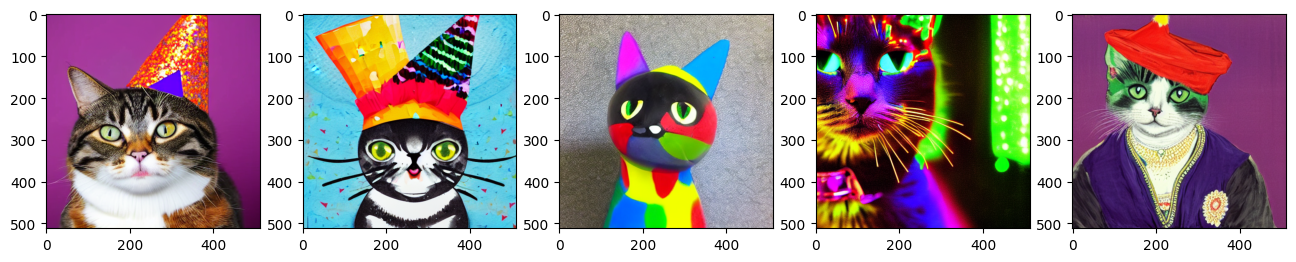

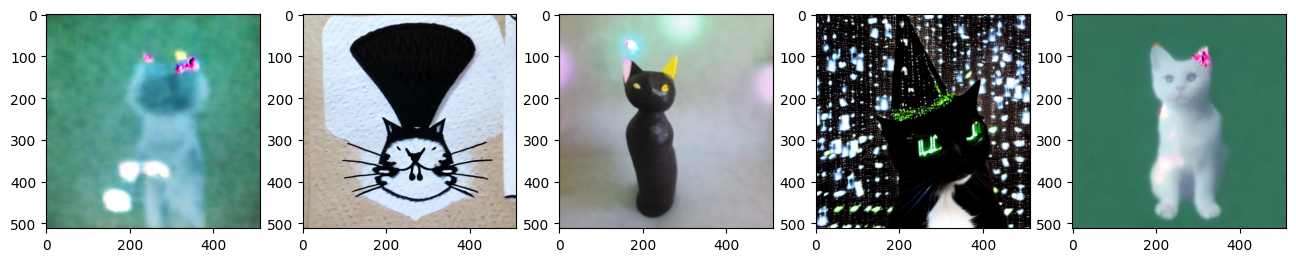

In [8]:
outputs_1 = []
outputs_2 = []
seed_values = [1,2,3,4,5]
prompt = " A cat wearing a party hat vivid colors"
#custom_loss_fn = blue_loss
custom_loss_scale = 100.0
num_styles = len(style_files)
for cnt in range(num_styles):
    style_token_embedding = get_style_embeddings(style_files[cnt]) if style_files[cnt] is not None else None
    this_generated_img_1 = stable_diffuser.generate_image_with_custom_style(prompt,
                                                          style_token_embedding = style_token_embedding,
                                                          random_seed = seed_values[cnt],
                                                          custom_loss_fn = None)
    outputs_1.append(this_generated_img_1)
    this_generated_img_2 = stable_diffuser.generate_image_with_custom_style(prompt,
                                                          style_token_embedding = style_token_embedding,
                                                          random_seed = seed_values[cnt],
                                                          custom_loss_fn = invert_loss,
                                                          custom_loss_scale = custom_loss_scale)
    outputs_2.append(this_generated_img_2)


show_images(outputs_1)
show_images(outputs_2)


